In [24]:
from argparse import Namespace
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

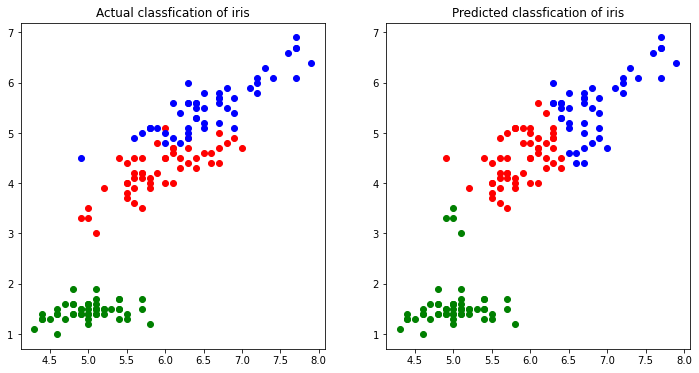

In [58]:
args = Namespace(
    seed=1234,
    n_clusters=3
)
dataset = datasets.load_iris(as_frame=True) # dataset for classification; 3 classes
X = dataset.data[['sepal length (cm)', 'petal length (cm)']] # pick two features for 2d visualisation
y = dataset.target

X_scaler = StandardScaler().fit(X) 
standardized_X = X_scaler.transform(X)

km = KMeans(n_clusters=args.n_clusters, random_state=args.seed)
km.fit(standardized_X)
pred = km.predict(standardized_X)

X_1, X_2, X_3 = X.to_numpy()[np.where(y==0)], X.to_numpy()[np.where(y==1)], X.to_numpy()[np.where(y==2)]
pred_1, pred_2, pred_3 = X.to_numpy()[np.where(pred==0)], X.to_numpy()[np.where(pred==1)], X.to_numpy()[np.where(pred==2)]


fig, (act, pre) = plt.subplots(1, 2, figsize=(12,6), sharex=True)
act.set_title('Actual classfication of iris')
act.scatter(X_1[:,0], X_1[:,1], color='green')
act.scatter(X_2[:,0], X_2[:,1], color='red')
act.scatter(X_3[:,0], X_3[:,1], color='blue')
pre.set_title('Predicted classfication of iris')
pre.scatter(pred_1[:,0], pred_1[:,1], color='blue')
pre.scatter(pred_2[:,0], pred_2[:,1], color='green')
pre.scatter(pred_3[:,0], pred_3[:,1], color='red')
